# Demo of loading a Caffe SSD Model using OpenCV on Predix

by Dattaraj J Rao - Principal Architect - GE Transportation - <a href='mailto:Dattaraj.Rao@ge.com'>Dattaraj.Rao@ge.com</a>

Code inspired by Adrian Rosebrock's post at: https://www.pyimagesearch.com/2017/08/21/deep-learning-with-opencv/

and OpenCV codebase: https://github.com/opencv/opencv/wiki/Deep-Learning-in-OpenCV

## Imports needed

In [13]:
import numpy as np
import cv2
from matplotlib import pyplot as plt 
import time

# This is needed to display the images.
%matplotlib inline

# Image size to use for analysis
IMAGE_SIZE = (12, 8)

# Confidence threshold for accepting predictions
PREDICT_THRESHOLD = 0.75

## Setup the environment - define variables, load image

## Load a (frozen) Tensorflow model into memory

In [14]:
# Model parameters
MODEL_PROTO = "Mobilenet-SSD/deploy.prototxt"
MODEL_FILE = "Mobilenet-SSD/MobileNetSSD_deploy.caffemodel"
MODEL_LABELS = "Mobilenet-SSD/labels.txt"

# load our serialized model from disk
print("[INFO] loading model...")
net = cv2.dnn.readNetFromCaffe(MODEL_PROTO, MODEL_FILE)

# load the class labels from disk
rows = open(MODEL_LABELS).read().strip().split("\n")
classes = [r[r.find(" ") + 1:].split(",")[0] for r in rows]

print("[INFO] Model loaded successfully")

[INFO] loading model...
[INFO] Model loaded successfully


In [15]:
def run_model(image_np):
    # define the reurn array
    retimages = {}
    # check image for None - best practice
    if image_np is None:
        return retimages
    # get image dimensions
    (h, w) = image.shape[:2]
    # create a conv net friendly image with mean averaging and scaling 
    blob = cv2.dnn.blobFromImage(cv2.resize(image_np, (300, 300)), 0.007843,(300, 300), 127.5)
    # pass this blob as input to the network
    net.setInput(blob)
    # call the model and get result from forward propogation
    detections = net.forward()
    # loop over the detections array
    for i in np.arange(0, detections.shape[2]):
        # extract the confidence (i.e., probability) associated with the prediction
        confidence = detections[0, 0, i, 2]
        # filter out weak detections by ensuring the `confidence` is
        # greater than the minimum confidence
        if confidence > PREDICT_THRESHOLD:
            # extract the index of the class label from the `detections`,
            # then compute the (x, y)-coordinates of the bounding box for
            # the object
            idx = int(detections[0, 0, i, 1])
            box = detections[0, 0, i, 3:7] * np.array([w, h, w, h])
            (startX, startY, endX, endY) = box.astype("int")

            # display the prediction
            label = "{}: {:.2f}%".format(classes[idx], confidence * 100)            
            print("[INFO] {}".format(label))  
            retimages[label] = image_np[startY:endY, startX:endX]
    return retimages

## Load the image to process

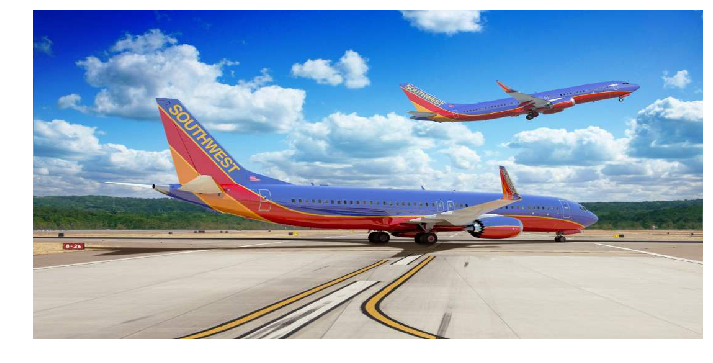

In [16]:
# The image file to use.
IMAGE_FILE = "airport.jpg"

# load the input image and construct an input blob for the image
image = cv2.imread(IMAGE_FILE)
image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)

plt.figure(figsize=IMAGE_SIZE)
plt.axis('off')
plt.imshow(image)


## Analyze the image using model by calling function

In [17]:
# set the blob as input to the network and perform a forward-pass to
# obtain our output classification
start = time.time()
results = run_model(image)
end = time.time()
print("Processed in {:.5} seconds".format(end - start))

[INFO] airplane: 100.00%
[INFO] airplane: 93.99%
Processed in 0.18401 seconds


## Decode the predicted classes and draw bounding boxes 

airplane: 93.99%
airplane: 100.00%


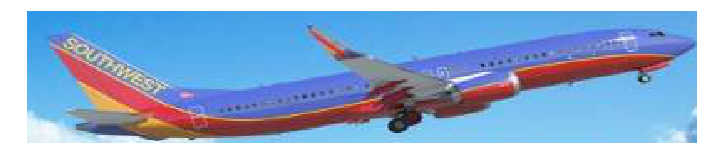

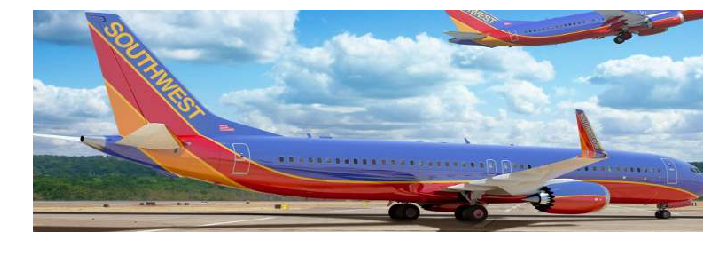

In [18]:
for res in results:
    plt.figure(figsize=IMAGE_SIZE)
    plt.axis('off')
    print(res)
    plt.imshow(results[res]) 
    
# display the output image
#plt.imshow(image)